![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# Мои подгрузки
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [5]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df_train.head(5)

Restaurant_id       City                                      Cuisine Style  \
0       id_5569      Paris            ['European', 'French', 'International']   
1       id_1535  Stockholm                                                NaN   
2        id_352     London  ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...   
3       id_3456     Berlin                                                NaN   
4        id_615     Munich  ['German', 'Central European', 'Vegetarian Fri...   

   Ranking  Rating Price Range  Number of Reviews  \
0   5570.0     3.5    $$ - $$$              194.0   
1   1537.0     4.0         NaN               10.0   
2    353.0     4.5        $$$$              688.0   
3   3458.0     5.0         NaN                3.0   
4    621.0     4.0    $$ - $$$               84.0   

                                             Reviews  \
0  [['Good food at your doorstep', 'A good hotel ...   
1  [['Unique cuisine', 'Delicious Nepalese food']...   
2  [['Catch up with friends', 'Not exceptional'],...   
3                                           [[], []]   
4  [['Best place to try a Bavarian food', 'Nice b...   

                                              URL_TA     ID_TA  
0  /Restaurant_Review-g187147-d1912643-Reviews-R_...  d1912643  
1  /Restaurant_Review-g189852-d7992032-Reviews-Bu...  d7992032  
2  /Restaurant_Review-g186338-d8632781-Reviews-RO...  d8632781  
3  /Restaurant_Review-g187323-d1358776-Reviews-Es...  d1358776  
4  /Restaurant_Review-g187309-d6864963-Reviews-Au...  d6864963

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [9]:
df_test.head(5)

Restaurant_id        City  \
0          id_0       Paris   
1          id_1    Helsinki   
2          id_2   Edinburgh   
3          id_3      London   
4          id_4  Bratislava   

                                       Cuisine Style  Ranking Price Range  \
0                                     ['Bar', 'Pub']  12963.0    $$ - $$$   
1  ['European', 'Scandinavian', 'Gluten Free Opti...    106.0    $$ - $$$   
2                            ['Vegetarian Friendly']    810.0    $$ - $$$   
3  ['Italian', 'Mediterranean', 'European', 'Vege...   1669.0        $$$$   
4  ['Italian', 'Mediterranean', 'European', 'Seaf...     37.0        $$$$   

   Number of Reviews                                            Reviews  \
0                4.0                                           [[], []]   
1               97.0  [['Very good reviews!', 'Fine dining in Hakani...   
2               28.0  [['Better than the Links', 'Ivy Black'], ['12/...   
3              202.0  [['Most exquisite', 'Delicious and authentic']...   
4              162.0  [['Always the best in bratislava', 'Very good ...   

                                              URL_TA      ID_TA  
0  /Restaurant_Review-g187147-d10746918-Reviews-L...  d10746918  
1  /Restaurant_Review-g189934-d6674944-Reviews-Ra...   d6674944  
2  /Restaurant_Review-g186525-d13129638-Reviews-B...  d13129638  
3  /Restaurant_Review-g186338-d680417-Reviews-Qui...    d680417  
4  /Restaurant_Review-g274924-d1112354-Reviews-Ma...   d1112354

In [10]:
sample_submission.head(5)

Restaurant_id  Rating
0          id_0     2.0
1          id_1     2.5
2          id_2     4.0
3          id_3     1.0
4          id_4     4.0

In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [14]:
data.sample(5)

Restaurant_id      City  \
24600      id_15379    London   
13034      id_15622    London   
42262       id_1518    Dublin   
26771       id_1238    Warsaw   
14165       id_1376  Brussels   

                                           Cuisine Style  Ranking Price Range  \
24600                     ['Cafe', 'British', 'Italian']  15391.0    $$ - $$$   
13034                                ['Cafe', 'British']  15634.0           $   
42262  ['Cafe', 'European', 'Contemporary', 'Healthy'...   1522.0    $$ - $$$   
26771                                                NaN   1239.0         NaN   
14165                                     ['Bar', 'Pub']   1371.0           $   

       Number of Reviews                                            Reviews  \
24600               65.0  [['Nice apple cake, tea only by the very smal....   
13034                4.0  [['Worst Breakfast Ever', 'great breakfast ven...   
42262               13.0  [['Lovely local gourmet cafe', 'Great Saturday...   
26771                4.0                                           [[], []]   
14165                5.0  [['Great coffee - quiet atmosphere', 'Coffee m...   

                                                  URL_TA      ID_TA  sample  \
24600  /Restaurant_Review-g186338-d733852-Reviews-Gol...    d733852       1   
13034  /Restaurant_Review-g186338-d8777975-Reviews-Jo...   d8777975       1   
42262  /Restaurant_Review-g186605-d4590438-Reviews-Th...   d4590438       1   
26771  /Restaurant_Review-g274856-d12480174-Reviews-T...  d12480174       1   
14165  /Restaurant_Review-g188644-d10798765-Reviews-V...  d10798765       1   

       Rating  
24600     3.0  
13034     2.5  
42262     4.0  
26771     4.5  
14165     5.0

In [15]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [16]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [17]:
data['Number_of_Reviews_isNAN'].sample(5)

10601    0
45952    0
199      0
34724    0
47677    0
Name: Number_of_Reviews_isNAN, dtype: uint8

In [18]:
data[data['Number_of_Reviews_isNAN'] == 1].Reviews.value_counts()
# Имеем 2023 пустых списка с последними двумя отзывами, что дает предположение, 
# что отзывов нет и по ним заполним NaN ['Number of Reviews'] = 0

[[], []]                                                         2023
[['Excellent desserts and breads'], ['10/18/2015']]                 1
[['Great for quick lunch or late breakfast'], ['10/06/2017']]       1
[['The real Hungarian Cousine'], ['03/22/2016']]                    1
[['Place for bier'], ['01/06/2014']]                                1
                                                                 ... 
[['Good food, excellent staff'], ['07/10/2013']]                    1
[['With all the famous Danish pastries'], ['01/23/2016']]           1
[['Amazing salad!'], ['09/06/2017']]                                1
[['Everything you need!'], ['04/23/2017']]                          1
[['Poslední country hospoda v Ďáblicích.'], ['08/20/2015']]         1
Name: Reviews, Length: 1177, dtype: int64

In [19]:
# Для пропусков в ['Number of Reviews'] нам необходимо обработать столбец с 2-мя последними отзывами.
# Это пригодится и в дальнейшем для анализа и формирования новых признаков.

In [20]:
# Форматирование столбца ['Reviews'] - на список с 2-мя элементами ['отзывы текст', 'даты отзывов']
data['Reviews'] = data['Reviews'].apply(lambda s: str(s).replace('[[','[').replace(']]',']').replace("], [","]%$[").replace("'","").split(sep = '%$'))

In [21]:
# Создаем для удобства промежуточный столбец - элемент списка 'даты отзыва' 
data['Reviews_date'] = data['Reviews'].apply(lambda s: s[1] if len(s) == 2 else 'NaN') 
# В столбце ['Reviews'] оставим только отзывы
data['Reviews'] = data['Reviews'].apply(lambda s: s[0] if len(s) == 2 else 'NaN')

In [22]:
# Функция для перевода строки в формат даты

def date_format(date_str):
    """Переводит строку в дату"""
    if len(date_str) > 10:
        dt_1 = date_str[1:11]
        dt_1 = pd.to_datetime(dt_1)
               
    if len(date_str) > 14:
        dt_2 = date_str[13:23]
        dt_2 = pd.to_datetime(dt_2)
          
    if len(date_str) < 10:
        return ['NaN', 'NaN']
    elif 10<len(date_str) < 22:
        return [dt_1, 'NaN']
    else:
        return [dt_1, dt_2]

In [23]:
data['date'] = data['Reviews_date'].apply(date_format)
data.drop(['Reviews_date'], axis = 1, inplace = True)
data['date_1'] = data['date'].apply(lambda d: d[0])
data['date_2'] = data['date'].apply(lambda d: d[1])

In [24]:
# # Проверка сколько отзывов с пропуском в Number_of_Reviews и заполненным Reviews 
# d1 = data[(data['Number_of_Reviews_isNAN'] == 1) & (data['Reviews'] != "[[], []]")]['date_1'].isna().count()
# d1x = data[(data['Number_of_Reviews_isNAN'] == 1) & (data['Reviews'] != "[[], []]")]['date_1'].isna().sum()
# d2 = data[(data['Number_of_Reviews_isNAN'] == 1) & (data['Reviews'] != "[[], []]")]['date_2'].isna().count()
# d2x = data[(data['Number_of_Reviews_isNAN'] == 1) & (data['Reviews'] != "[[], []]")]['date_2'].isna().sum()
# print(f'{d1} - {d1x} = {d1-d1x} - При пропуске в "Number of Reviews" есть 1 отзыв' ) 
# print(f'{d2} - {d2x} = {d2-d2x} - При пропуске в "Number of Reviews" есть 2 отзыва') 
# # У части пропусков имеется 1 отзыв при пропущенном значении 

In [25]:
# Оказалось менее эффективно
# def fill_Number_of_Reviews(row):
#     """Функция для заполнения пропусков ['Number of Reviews']
#        по количеству отзывов 0 или 1"""
#     if int(row.loc['Number_of_Reviews_isNAN']) == 1:
#         if len(str(row.loc['date_1']))>3:
#             return 1
#         else:
#             return 0
#     else:
#         return row.loc['Number of Reviews']
    

In [26]:
# Далее заполняем пропуски ['Number of Reviews']
#data['Number of Reviews'] = data.apply(fill_Number_of_Reviews, axis = 1)

In [27]:
# Попробуем заполнить медианой (Может лучше будет результат)
# МАЕ оказался лучше
med = data['Number of Reviews'].median()
data['Number of Reviews'].fillna(med, inplace = True)
data['Number of Reviews'].value_counts()

33.0      3514
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
1330.0       1
1169.0       1
2148.0       1
8927.0       1
995.0        1
Name: Number of Reviews, Length: 1573, dtype: int64

In [28]:
print('Медиана:', data['Number of Reviews'].median())
print("Кол-во уник значений:\n", data['Number of Reviews'].value_counts(), sep="")

Медиана: 33.0
Кол-во уник значений:
33.0      3514
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
1330.0       1
1169.0       1
2148.0       1
8927.0       1
995.0        1
Name: Number of Reviews, Length: 1573, dtype: int64


<AxesSubplot:>

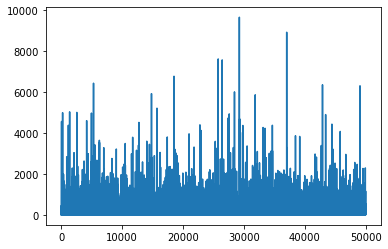

In [29]:
# Очень подозрительная разница в количестве отзывов у некоторых ресторанов
# больше 1000 - предположительно отзывы  могли быть накручены, задвоится,  
data['Number of Reviews'].plot()

In [30]:
print('Доходят до', round(data['Number of Reviews'].max())) 
print('Рестораны, имеющие больше 100 отзывов', data[data['Number of Reviews']>100]['Number of Reviews'].count(),
      'из', data['Number of Reviews'].count(), 'что составляет', 
      data[data['Number of Reviews']>100]['Number of Reviews'].count()/data['Number of Reviews'].count()) 
# больше 100 имеют около 25%
print('Рестораны, имеющие больше 1000 отзывов', data[data['Number of Reviews']>1000]['Number of Reviews'].count(),
     'из', data['Number of Reviews'].count(), 'что составляет', 
      data[data['Number of Reviews']>1000]['Number of Reviews'].count()/data['Number of Reviews'].count())


Доходят до 9660
Рестораны, имеющие больше 100 отзывов 12843 из 50000 что составляет 0.25686
Рестораны, имеющие больше 1000 отзывов 817 из 50000 что составляет 0.01634


In [31]:
# Возможно много отзывов у кафе или баров с большой проходимостью, низкой или средней ценовой категории
# Проверим,чем особенны такие рестораны с большим количеством отзывов:
data[data['Number of Reviews']>1000][['Restaurant_id', 'Number of Reviews', 'Cuisine Style', 'City', 'Price Range']]['Price Range'].value_counts()
# Посмотрев разные варианты. Никакой закономерности не выявила, как влияют разнвые признаки на большое количество отзывов

$$ - $$$    588
$$$$        148
$            74
Name: Price Range, dtype: int64

In [32]:
print('Распределение рейтинга ресторанов с отзывами более 1000')
data[data['Number of Reviews']>1000][['Number of Reviews', 'Rating', 'City', 'Price Range']]['Rating'].value_counts(normalize = True)

Распределение рейтинга ресторанов с отзывами более 1000


4.0    0.356181
4.5    0.347613
0.0    0.176255
3.5    0.100367
5.0    0.009792
3.0    0.008568
2.5    0.001224
Name: Rating, dtype: float64

In [33]:
print('Распределение рейтинга ресторанов с отзывами менее 1000')
data[data['Number of Reviews']<1000][['Number of Reviews', 'Rating', 'City', 'Price Range']]['Rating'].value_counts(normalize = True)

Распределение рейтинга ресторанов с отзывами менее 1000


4.0    0.272472
4.5    0.216437
0.0    0.200394
3.5    0.137080
5.0    0.078706
3.0    0.059939
2.5    0.018584
2.0    0.009475
1.0    0.004087
1.5    0.002826
Name: Rating, dtype: float64

In [34]:
# Не улучшило МАЕ
# # Всего 1.5% ресторанов имеют отзывов больше 1000 и они сильно искажают картину 
# # При том, что распределение у них как и у ресторанов с меньшими отзывами
# # Посчитаем отсечку для выбросов (и все высокие отзывы прировняем к этой отсечки):
# q1 = data['Number of Reviews'].quantile(q=0.25)
# q3 = data['Number of Reviews'].quantile(q=0.75)
# iqr = q3-q1
# cutoff = q3+iqr*1.5
# print('Отсечка по количеству отзывов', cutoff)

In [35]:
# Отзывы типа выбросы приравняем к cutoff 
#data['Number of Reviews'] = data['Number of Reviews'].apply(lambda i: cutoff if i > cutoff else i)

# Нормализуем количество отзывов от 0 до 1
data['norm Number of Reviews'] = scaler.fit_transform(data[['Number of Reviews']])

In [36]:
# Заполним пропуски ['Price Range']
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [37]:
data['Price_Range_isNAN'].value_counts(normalize = True)
# Пропусков 35%. Это, однако, много.

0    0.65278
1    0.34722
Name: Price_Range_isNAN, dtype: float64

In [38]:
data['Price Range'].value_counts(normalize = True)

$$ - $$$    0.705935
$           0.239468
$$$$        0.054597
Name: Price Range, dtype: float64

In [39]:
# Так как 70% составлет значение признака ['Price Range'] - '$$ - $$$' 
# То заполняем пропуски '$$ - $$$'
data['Price Range'].fillna('$$ - $$$', inplace=True)

In [40]:
data.sample(5)

Restaurant_id       City  \
570          id_570  Barcelona   
27480       id_7646     Madrid   
7190        id_7190  Ljubljana   
46314        id_479      Milan   
26219       id_1099     Oporto   

                                           Cuisine Style  Ranking Price Range  \
570    ['Italian', 'Pizza', 'Mediterranean', 'Vegetar...   2160.0    $$ - $$$   
27480                                                NaN   7653.0    $$ - $$$   
7190           ['Chinese', 'Japanese', 'Sushi', 'Asian']    452.0    $$ - $$$   
46314  ['Italian', 'Pizza', 'Vegetarian Friendly', 'V...    480.0    $$ - $$$   
26219                                                NaN   1100.0    $$ - $$$   

       Number of Reviews                                            Reviews  \
570                136.0  [Good local restaurant, A REAL ITALIAN TRATTOR...   
27480                8.0  [Very good quality, Best tasting kebab in Madr...   
7190                21.0  [Very bad experience, very poor choice, almost...   
46314              166.0                       [Buonísimo!, Fun night out!]   
26219                3.0    [Pleasant coffee bar by the Bolhao market a...]   

                                                  URL_TA      ID_TA  sample  \
570    /Restaurant_Review-g187497-d1911830-Reviews-El...   d1911830       0   
27480  /Restaurant_Review-g187514-d8557129-Reviews-Bu...   d8557129       1   
7190   /Restaurant_Review-g274873-d4040968-Reviews-Ru...   d4040968       0   
46314  /Restaurant_Review-g187849-d12958548-Reviews-P...  d12958548       1   
26219  /Restaurant_Review-g189180-d11434293-Reviews-P...  d11434293       1   

       Rating  Number_of_Reviews_isNAN  \
570       0.0                        0   
27480     3.0                        0   
7190      0.0                        0   
46314     4.5                        0   
26219     4.5                        0   

                                             date     date_1     date_2  \
570    [2017-04-24 00:00:00, 2017-08-11 00:00:00] 2017-04-24 2017-08-11   
27480  [2016-10-01 00:00:00, 2016-09-01 00:00:00] 2016-10-01 2016-09-01   
7190   [2017-12-12 00:00:00, 2016-09-03 00:00:00] 2017-12-12 2016-09-03   
46314  [2018-01-04 00:00:00, 2017-12-15 00:00:00] 2018-01-04 2017-12-15   
26219                  [2017-04-03 00:00:00, NaN] 2017-04-03        NaT   

       norm Number of Reviews  Price_Range_isNAN  
570                  0.013875                  0  
27480                0.000621                  1  
7190                 0.001967                  0  
46314                0.016981                  0  
26219                0.000104                  1

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Restaurant_id            50000 non-null  object        
 1   City                     50000 non-null  object        
 2   Cuisine Style            38410 non-null  object        
 3   Ranking                  50000 non-null  float64       
 4   Price Range              50000 non-null  object        
 5   Number of Reviews        50000 non-null  float64       
 6   Reviews                  50000 non-null  object        
 7   URL_TA                   50000 non-null  object        
 8   ID_TA                    50000 non-null  object        
 9   sample                   50000 non-null  int64         
 10  Rating                   50000 non-null  float64       
 11  Number_of_Reviews_isNAN  50000 non-null  uint8         
 12  date                     50000 n

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [42]:
# Почему-то не работает. Разберусь позже
# data.nunique(dropna=False)

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [43]:
# Посмотрим сколько ресторанов в каждом городе
# Это дает с одной сороны конкуренцию и с другой стороны значит и спрос выше (людей больше, туристы и пр. факторы)
city_dict = data['City'].value_counts().to_dict()
city_dict

{'London': 7193,
 'Paris': 6108,
 'Madrid': 3813,
 'Barcelona': 3395,
 'Berlin': 2705,
 'Milan': 2694,
 'Rome': 2589,
 'Prague': 1816,
 'Lisbon': 1647,
 'Vienna': 1443,
 'Amsterdam': 1372,
 'Brussels': 1314,
 'Hamburg': 1186,
 'Munich': 1145,
 'Lyon': 1126,
 'Stockholm': 1033,
 'Budapest': 1021,
 'Warsaw': 925,
 'Dublin': 836,
 'Copenhagen': 819,
 'Athens': 776,
 'Edinburgh': 745,
 'Zurich': 685,
 'Oporto': 642,
 'Geneva': 590,
 'Krakow': 554,
 'Oslo': 488,
 'Helsinki': 475,
 'Bratislava': 380,
 'Luxembourg': 263,
 'Ljubljana': 222}

In [44]:
# Добавим колонку с количеством ресторанов в городе в базу и сразу нормируем ее 
data['Count restaurants city'] = data['City'].apply(lambda s: city_dict[s])

data['norm Count restaurants city'] = scaler.fit_transform(data[['Count restaurants city']])

In [45]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data['City_'] = data['City'] # оздадим копию, возможно оригинал нам потом пригодится
data = pd.get_dummies(data, columns=['City_'])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Restaurant_id                50000 non-null  object        
 1   City                         50000 non-null  object        
 2   Cuisine Style                38410 non-null  object        
 3   Ranking                      50000 non-null  float64       
 4   Price Range                  50000 non-null  object        
 5   Number of Reviews            50000 non-null  float64       
 6   Reviews                      50000 non-null  object        
 7   URL_TA                       50000 non-null  object        
 8   ID_TA                        50000 non-null  object        
 9   sample                       50000 non-null  int64         
 10  Rating                       50000 non-null  float64       
 11  Number_of_Reviews_isNAN      50000 non-nu

In [47]:
data.sample(5)

Restaurant_id       City  \
28751       id_1103  Barcelona   
22240       id_1532     Munich   
7705        id_7705     Warsaw   
21715       id_7133  Barcelona   
38444        id_446       Lyon   

                                        Cuisine Style  Ranking Price Range  \
28751                          ['French', 'European']   1104.0    $$ - $$$   
22240                                  ['Vietnamese']   1545.0    $$ - $$$   
7705   ['Italian', 'European', 'Vegetarian Friendly']    422.0    $$ - $$$   
21715                                             NaN   7134.0    $$ - $$$   
38444                               ['Mediterranean']    447.0    $$ - $$$   

       Number of Reviews                                            Reviews  \
28751              121.0       [Typically french crepes, french restaurant]   
22240               33.0                                                 []   
7705               166.0  [It is a bit less, but..., Good Service and food]   
21715               28.0                         [Rip off, Family friendly]   
38444               16.0                                                 []   

                                                  URL_TA      ID_TA  sample  \
28751  /Restaurant_Review-g187497-d8058523-Reviews-Le...   d8058523       1   
22240  /Restaurant_Review-g187309-d5509303-Reviews-Ph...   d5509303       1   
7705   /Restaurant_Review-g274856-d802021-Reviews-Bor...    d802021       0   
21715  /Restaurant_Review-g187497-d3461265-Reviews-Si...   d3461265       1   
38444  /Restaurant_Review-g187265-d13205816-Reviews-E...  d13205816       1   

       ...  City__Munich  City__Oporto City__Oslo City__Paris City__Prague  \
28751  ...             0             0          0           0            0   
22240  ...             1             0          0           0            0   
7705   ...             0             0          0           0            0   
21715  ...             0             0          0           0            0   
38444  ...             0             0          0           0            0   

       City__Rome  City__Stockholm  City__Vienna  City__Warsaw  City__Zurich  
28751           0                0             0             0             0  
22240           0                0             0             0             0  
7705            0                0             0             1             0  
21715           0                0             0             0             0  
38444           0                0             0             0             0  

[5 rows x 50 columns]

#### Возьмем следующий признак "Price Range".

In [48]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [49]:
# Ваша обработка 'Price Range'
def PriceRange123(price):
    """Функция обработки 'Price Range' к виду 1 или 2 или 3"""
    
    if price == '$':
        return 1
    elif price == '$$ - $$$':
        return 2
    elif price == '$$$$':
        return 3
    else:
        return 0  

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

In [50]:
data['Price Range'] = data['Price Range'].apply(PriceRange123)
data['Price Range'].value_counts()

2    40402
1     7816
3     1782
Name: Price Range, dtype: int64

In [51]:
# Обработка признака One-Hot Encoding, и по итогу тестов она оказалась эффективнее, чем разделение на 123 
data = pd.get_dummies(data, columns=['Price Range'])

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [52]:
# тут ваш код на обработку других признаков
# Теперь займемся кухнями
# У нас пропусков порядка 25%
data['Cuisine Style'].isna().sum()

11590

In [53]:
# Создадим отдельный столбец для нан и не нан
data['Cuisine Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [54]:
# Приведем к нужному формату список со стилями кухонь
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda s: str(s).replace('[', '').replace(']', '').replace("'", "").split(sep = ', '))

In [55]:
# Так как ресторан не может работать без кухни, то пропуск будем заполнять 1, медианой или средним. 
# Что лучше зайдет

In [56]:
# Посчитаем медиану и средннее в количестве кухонь
mediana_cuisin = data[data['Cuisine Style_isNAN']==0]['Cuisine Style'].apply(len).median()
mean_cuisine = data[data['Cuisine Style_isNAN']==0]['Cuisine Style'].apply(len).mean()
print(mediana_cuisin,  round(mean_cuisine, 1))
# Получается медиана 3 и средее около 3
data[data['Cuisine Style_isNAN']==0]['Cuisine Style'].apply(len).count()

3.0 3.1


38410

In [57]:
data[data['Cuisine Style_isNAN']==0]['Cuisine Style'].apply(len).value_counts()

1     9154
2     7794
3     6638
4     5948
5     4482
6     2611
7     1294
8      363
9       93
10      26
11       4
13       1
15       1
21       1
Name: Cuisine Style, dtype: int64

In [58]:
# Добавим новым столбец (признак): количество видов кухонь в ресторане. 
# Пропуск - интерпритируем как 1 вид. MAE хуже
# data['Cuisine Style amount'] = data['Cuisine Style'].apply(len)

# Пропуск - интерпритируем как медиана.
data['Cuisine Style amount'] = data['Cuisine Style'].apply(lambda s: len(s) if s != ['nan'] else mediana_cuisin)

# Нормируем ['Cuisine Style amount']
data['norm Cuisine Style amount'] = scaler.fit_transform(data[['Cuisine Style amount']])
data['Cuisine Style amount'].value_counts()

3.0     18228
1.0      9154
2.0      7794
4.0      5948
5.0      4482
6.0      2611
7.0      1294
8.0       363
9.0        93
10.0       26
11.0        4
15.0        1
21.0        1
13.0        1
Name: Cuisine Style amount, dtype: int64

In [59]:
# Подозрительно, что некоторые имеют по 13, 15 и 21 кухни
restaurant_21_cuisine = data[data['Cuisine Style amount'] == 21]['Cuisine Style']
print(list(restaurant_21_cuisine))
# Странный однако ресторан. И чтец, и жнец и на дуде игрец

[['Asian', 'Italian', 'French', 'American', 'Indian', 'Dutch', 'Bar', 'Seafood', 'Fast Food', 'Mediterranean', 'Sushi', 'European', 'Spanish', 'Korean', 'Turkish', 'Grill', 'Vietnamese', 'Street Food', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']]


In [60]:
# Создадим множество видов кухни
cuisine_style_set = set()
for i in data['Cuisine Style']:
    for j in i:
        cuisine_style_set.add(j)

print(f'Всего {len(cuisine_style_set)} видов кухни')
print(cuisine_style_set)


Всего 126 видов кухни
{'Vegan Options', 'German', 'Sushi', 'Polynesian', 'South American', 'Minority Chinese', 'Filipino', 'Pub', 'Seafood', 'Slovenian', 'Azerbaijani', 'Cuban', 'Arabic', 'Belgian', 'Grill', 'Central European', 'Peruvian', 'Brazilian', 'Hungarian', 'Venezuelan', 'Fast Food', 'Jamaican', 'Swedish', 'Native American', 'Austrian', 'Ecuadorean', 'Swiss', 'Salvadoran', 'Malaysian', 'Tunisian', 'Ukrainian', 'Gluten Free Options', 'Asian', 'Latin', 'Dutch', 'Burmese', 'Healthy', 'Japanese', 'Mediterranean', 'Lebanese', 'European', 'Yunnan', 'Bar', 'Fujian', 'Delicatessen', 'Singaporean', 'Pizza', 'Danish', 'Nepali', 'nan', 'Diner', 'Pakistani', 'Middle Eastern', 'Scottish', 'Wine Bar', 'Halal', 'Gastropub', 'Chinese', 'Sri Lankan', 'Greek', 'Croatian', 'Vegetarian Friendly', 'Uzbek', 'Barbecue', 'Taiwanese', 'Caucasian', 'Vietnamese', 'New Zealand', 'Irish', 'Xinjiang', 'Norwegian', 'Korean', 'Afghani', 'Argentinean', 'Romanian', 'Tibetan', 'Canadian', 'Indian', 'Steakhouse',

In [61]:
# Посчитаем сколько раз встречается каждая кухня.
# Создадим словарь кухонь:
cuisine_style_dict = {}

# Заполним словарь ключами - стили кухни
for i in cuisine_style_set:
    cuisine_style_dict[i] = 0

# Заполним словарь количеством ресторанов у которых есть такие кухни.
for i in data['Cuisine Style']:
    for j in i:
        cuisine_style_dict[j] +=1

cuisine_style_dict

{'Vegan Options': 5684,
 'German': 820,
 'Sushi': 1450,
 'Polynesian': 2,
 'South American': 490,
 'Minority Chinese': 12,
 'Filipino': 17,
 'Pub': 3058,
 'Seafood': 1878,
 'Slovenian': 85,
 'Azerbaijani': 3,
 'Cuban': 32,
 'Arabic': 58,
 'Belgian': 335,
 'Grill': 617,
 'Central European': 1727,
 'Peruvian': 130,
 'Brazilian': 152,
 'Hungarian': 444,
 'Venezuelan': 51,
 'Fast Food': 2122,
 'Jamaican': 36,
 'Swedish': 223,
 'Native American': 5,
 'Austrian': 462,
 'Ecuadorean': 8,
 'Swiss': 223,
 'Salvadoran': 1,
 'Malaysian': 38,
 'Tunisian': 23,
 'Ukrainian': 20,
 'Gluten Free Options': 5185,
 'Asian': 3786,
 'Latin': 373,
 'Dutch': 368,
 'Burmese': 1,
 'Healthy': 758,
 'Japanese': 1860,
 'Mediterranean': 7820,
 'Lebanese': 397,
 'European': 12561,
 'Yunnan': 2,
 'Bar': 4094,
 'Fujian': 2,
 'Delicatessen': 473,
 'Singaporean': 21,
 'Pizza': 3502,
 'Danish': 225,
 'Nepali': 121,
 'nan': 11590,
 'Diner': 375,
 'Pakistani': 140,
 'Middle Eastern': 980,
 'Scottish': 199,
 'Wine Bar': 877,

In [62]:
# Не принесло улучшение. Уже в конце оставим только столбцы с популярными видами

# Есть редкие виды кухни которые используют малое количество ресторанов. 
# При get_dummies их можно объединить в 'other', вопрос только от какого количества.
#list_value = sorted(list(cuisine_style_dict.values()))

#coefficient = 0.05 # Возьмем % от общего колличества
#summa_for_other = sum(list_value)*coefficient 
#print(coefficient, 'от общего количества составит:', summa_for_other)

#search_sum = 0
#n = -1
#for i in list_value:
#    if search_sum > summa_for_other:
#        break
#    search_sum += i
#    n += 1
    
#print(f'Сумма первых {n}-элементов в списке - ', sum(list_value[0:n]))
#cutoff = list_value[n+1:][0] # с 444 раскидываем, остальное в other
#print(f'Отсечка по значению с количетва ресторанов, используемых кухню - {cutoff}')

In [63]:
# отберем стили кухонь которые надо перевести в группу other и для которых создадим отдельные столбецы
#cuisine_other_list = [] # Эти кухни переведуться в 'other'
#cuisine_col_list = ['other'] # По этим кухням будут созданы столбцы Dummies

#for key, val in cuisine_style_dict.items():
#    if val < cutoff:
#        cuisine_other_list.append(key)
#    else:
#        cuisine_col_list.append(key)
#cuisine_col_list

In [64]:
# Создадим новый столбец с кухнями, с учетом замены редко встречающих на 'other'
#def replace_other(Cuisine_list):
#    for i in range(len(Cuisine_list)):
#        for el_other in cuisine_other_list:
#            if Cuisine_list[i] == el_other:
#                Cuisine_list[i] = 'other'
#    return Cuisine_list
                
#data['Cuisine Style with other'] = data['Cuisine Style'].apply(replace_other)
#data['Cuisine Style with other']

In [65]:
def find_item(cell):
    """Заполлняет значение в новых столбцах: есть - 1, нет - 0"""
    if item in cell:
        return 1
    return 0

# Цикл, в котором будут создаваться столбцы с информацией о стиле кухне в ресторане:
for item in cuisine_style_set:
    data[item] = data['Cuisine Style'].apply(find_item)


In [66]:
# Посмотрим популярность кухни в каждом городе и для удобства транспонируем
cuisine_in_city = data.groupby(['City'])[['Afghani', 'Turkish', 'Uzbek', 'Fujian', 'Thai', 'Yunnan', 
                             'Sri Lankan', 'Bar', 'Taiwanese', 'Healthy', 'Minority Chinese', 
                             'Russian', 'Pakistani', 'Vegan Options', 'Israeli', 'Austrian', 
                             'Cambodian', 'Scandinavian', 'Cafe', 'Irish', 'American', 'Seafood', 
                             'Danish', 'Vegetarian Friendly', 'Mediterranean', 'Barbecue', 'Pub', 
                             'International', 'Lebanese', 'Chinese', 'Asian', 'Swedish', 
                             'Azerbaijani', 'Fast Food', 'Argentinean', 'Norwegian', 'Polish', 
                             'Japanese', 'Armenian', 'African', 'Caucasian', 'Street Food', 
                             'Indian', 'Latin', 'Southwestern', 'Eastern European', 'Wine Bar', 
                             'Scottish', 'Moroccan', 'Brew Pub', 'Tibetan', 'Hungarian', 'Diner', 
                             'Dutch', 'Filipino', 'Chilean', 'Cuban', 'Caribbean', 'Ukrainian', 
                             'Mongolian', 'Peruvian', 'Vietnamese', 'Brazilian', 'Swiss', 
                             'Contemporary', 'Greek', 'Spanish', 'Delicatessen', 'Salvadoran', 
                             'Ethiopian', 'Mexican', 'German', 'Malaysian', 'Slovenian', 'Georgian', 
                             'nan', 'Gluten Free Options', 'Portuguese', 'Soups', 'Albanian', 'Balti', 
                             'New Zealand', 'Singaporean', 'Polynesian', 'Korean', 'Sushi', 
                             'Central European', 'South American', 'Canadian', 'Kosher', 'Arabic', 
                             'Middle Eastern', 'Hawaiian', 'Italian', 'Ecuadorean', 'Central Asian', 
                             'Welsh', 'Czech', 'Halal', 'Cajun & Creole', 'Gastropub', 'Belgian', 
                             'Colombian', 'Tunisian', 'Jamaican', 'Latvian', 'Central American', 
                             'British', 'Persian', 'Grill', 'Nepali', 'Australian', 'European', 
                             'French', 'Native American', 'Burmese', 'Fusion', 'Indonesian', 
                             'Romanian', 'Xinjiang', 'Bangladeshi', 'Pizza', 'Venezuelan', 
                             'Croatian', 'Egyptian', 'Steakhouse']].sum().T

cuisine_in_city

City        Amsterdam  Athens  Barcelona  Berlin  Bratislava  Brussels  \
Afghani             1       0          0       1           0         0   
Turkish            29       6         14      65           1        12   
Uzbek               0       0          1       0           0         0   
Fujian              0       0          0       0           0         0   
Thai               27       6         17      64           6        38   
...               ...     ...        ...     ...         ...       ...   
Pizza              71      25        170     141          32        71   
Venezuelan          0       0         10       0           0         0   
Croatian            0       0          1       8           0         1   
Egyptian            1       0          0       5           1         1   
Steakhouse         50      28         45      37           5        12   

City        Budapest  Copenhagen  Dublin  Edinburgh  ...  Munich  Oporto  \
Afghani            1           0       1          0  ...       9       0   
Turkish           15           6       1         19  ...      21       0   
Uzbek              0           0       0          0  ...       0       0   
Fujian             0           0       0          0  ...       0       0   
Thai              14          31      34         13  ...      21       1   
...              ...         ...     ...        ...  ...     ...     ...   
Pizza             73          46      71         69  ...      65      15   
Venezuelan         0           1       0          0  ...       1       2   
Croatian           0           2       1          0  ...       4       0   
Egyptian           1           0       1          0  ...       0       0   
Steakhouse        11          12      17         13  ...      11      13   

City        Oslo  Paris  Prague  Rome  Stockholm  Vienna  Warsaw  Zurich  
Afghani        0      2       0     1          0       0       0       0  
Turkish       10     23      16     3         11      19       7       9  
Uzbek          0      0       2     0          0       0       0       0  
Fujian         0      0       0     0          0       0       0       0  
Thai          22    161      24    11         36      13      33      28  
...          ...    ...     ...   ...        ...     ...     ...     ...  
Pizza         35    248      94   675         55      99      50      47  
Venezuelan     0      2       1     1          0       1       0       0  
Croatian       0      0       1     0          0       8       3       0  
Egyptian       0      2       0     1          0       1       0       0  
Steakhouse     7     39      24    30         15      17      12      12  

[126 rows x 31 columns]

In [67]:
# Сформируем признак - насколько популярные кухни в своем городе использует ресторан
# Нормируем, тогда признаки выстроятся в типа рейтинг внутри кажждого города
norm_cuisine_in_city = cuisine_in_city.copy()
for el in norm_cuisine_in_city.columns:
    norm_cuisine_in_city[el] = scaler.fit_transform(norm_cuisine_in_city[[el]])
norm_cuisine_in_city

City        Amsterdam    Athens  Barcelona    Berlin  Bratislava  Brussels  \
Afghani      0.001618  0.000000   0.000000  0.001096    0.000000  0.000000   
Turkish      0.046926  0.014354   0.010219  0.071272    0.006944  0.025263   
Uzbek        0.000000  0.000000   0.000730  0.000000    0.000000  0.000000   
Fujian       0.000000  0.000000   0.000000  0.000000    0.000000  0.000000   
Thai         0.043689  0.014354   0.012409  0.070175    0.041667  0.080000   
...               ...       ...        ...       ...         ...       ...   
Pizza        0.114887  0.059809   0.124088  0.154605    0.222222  0.149474   
Venezuelan   0.000000  0.000000   0.007299  0.000000    0.000000  0.000000   
Croatian     0.000000  0.000000   0.000730  0.008772    0.000000  0.002105   
Egyptian     0.001618  0.000000   0.000000  0.005482    0.006944  0.002105   
Steakhouse   0.080906  0.066986   0.032847  0.040570    0.034722  0.025263   

City        Budapest  Copenhagen    Dublin  Edinburgh  ...    Munich  \
Afghani     0.001848    0.000000  0.003077   0.000000  ...  0.023018   
Turkish     0.027726    0.019048  0.003077   0.050802  ...  0.053708   
Uzbek       0.000000    0.000000  0.000000   0.000000  ...  0.000000   
Fujian      0.000000    0.000000  0.000000   0.000000  ...  0.000000   
Thai        0.025878    0.098413  0.104615   0.034759  ...  0.053708   
...              ...         ...       ...        ...  ...       ...   
Pizza       0.134935    0.146032  0.218462   0.184492  ...  0.166240   
Venezuelan  0.000000    0.003175  0.000000   0.000000  ...  0.002558   
Croatian    0.000000    0.006349  0.003077   0.000000  ...  0.010230   
Egyptian    0.001848    0.000000  0.003077   0.000000  ...  0.000000   
Steakhouse  0.020333    0.038095  0.052308   0.034759  ...  0.028133   

City          Oporto      Oslo     Paris    Prague      Rome  Stockholm  \
Afghani     0.000000  0.000000  0.000831  0.000000  0.000576   0.000000   
Turkish     0.000000  0.060606  0.009551  0.017857  0.001728   0.034056   
Uzbek       0.000000  0.000000  0.000000  0.002232  0.000000   0.000000   
Fujian      0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
Thai        0.002755  0.133333  0.066860  0.026786  0.006336   0.111455   
...              ...       ...       ...       ...       ...        ...   
Pizza       0.041322  0.212121  0.102990  0.104911  0.388825   0.170279   
Venezuelan  0.005510  0.000000  0.000831  0.001116  0.000576   0.000000   
Croatian    0.000000  0.000000  0.000000  0.001116  0.000000   0.000000   
Egyptian    0.000000  0.000000  0.000831  0.000000  0.000576   0.000000   
Steakhouse  0.035813  0.042424  0.016196  0.026786  0.017281   0.046440   

City          Vienna    Warsaw    Zurich  
Afghani     0.000000  0.000000  0.000000  
Turkish     0.035185  0.022364  0.034091  
Uzbek       0.000000  0.000000  0.000000  
Fujian      0.000000  0.000000  0.000000  
Thai        0.024074  0.105431  0.106061  
...              ...       ...       ...  
Pizza       0.183333  0.159744  0.178030  
Venezuelan  0.001852  0.000000  0.000000  
Croatian    0.014815  0.009585  0.000000  
Egyptian    0.001852  0.000000  0.000000  
Steakhouse  0.031481  0.038339  0.045455  

[126 rows x 31 columns]

In [68]:
# Напишем функцию по формированию признака популярности кухни в городе

def popularity_of_cuisine(row, df = norm_cuisine_in_city):
    ratio = 0
    for cuisine in row['Cuisine Style']:
        ratio += df.loc[cuisine, row['City']]
    return ratio

data['popularity_of_cuisine'] = data.apply(popularity_of_cuisine, axis = 1)
# НОрмируем его сразу
data['popularity_of_cuisine'] = scaler.fit_transform(data[['popularity_of_cuisine']])

In [69]:
# Так как в каждом городе количество ресторанов сильно отличается, то нормированние внутрегородского 
# ранга ресторана от 0 до 1 произведем по городам 

city_list = list(data['City'].unique())
# Создадим пустой словарь с названием города и min - max рангом
city_min_max_Ranking = {}

for i in city_list:
    city_min_max_Ranking[i] = [data['Ranking'][data['City'] == i].min(), data['Ranking'][data['City'] == i].max()]
    
city_min_max_Ranking

{'Paris': [3.0, 13986.0],
 'Helsinki': [4.0, 1141.0],
 'Edinburgh': [1.0, 1766.0],
 'London': [1.0, 16444.0],
 'Bratislava': [3.0, 889.0],
 'Lisbon': [1.0, 3717.0],
 'Budapest': [1.0, 2440.0],
 'Stockholm': [1.0, 2464.0],
 'Rome': [1.0, 5948.0],
 'Milan': [1.0, 6275.0],
 'Munich': [3.0, 2763.0],
 'Hamburg': [1.0, 2737.0],
 'Prague': [2.0, 4188.0],
 'Vienna': [1.0, 3444.0],
 'Dublin': [4.0, 1960.0],
 'Barcelona': [5.0, 7796.0],
 'Brussels': [3.0, 3006.0],
 'Madrid': [1.0, 8809.0],
 'Oslo': [1.0, 1137.0],
 'Amsterdam': [1.0, 3254.0],
 'Berlin': [2.0, 6372.0],
 'Lyon': [1.0, 2666.0],
 'Athens': [3.0, 1787.0],
 'Warsaw': [1.0, 2154.0],
 'Oporto': [4.0, 1484.0],
 'Krakow': [1.0, 1244.0],
 'Copenhagen': [3.0, 1964.0],
 'Luxembourg': [2.0, 621.0],
 'Zurich': [2.0, 1601.0],
 'Geneva': [3.0, 1413.0],
 'Ljubljana': [3.0, 468.0]}

In [70]:
# Сделаем нормализацию ['Ranking'] MinMax (от 0 до 1) по городам
def Ranking_norm_0_1(row):
    city = row['City']
    x_min = city_min_max_Ranking[city][0]
    x_max = city_min_max_Ranking[city][1]
    return (row['Ranking'] - x_min)/(x_max - x_min)

data['norm Ranking'] = data.apply(Ranking_norm_0_1, axis = 1)
data['norm Ranking']

0        0.926840
1        0.089710
2        0.458357
3        0.101441
4        0.038375
           ...   
49995    0.079535
49996    0.453265
49997    0.670321
49998    0.297260
49999    0.769206
Name: norm Ranking, Length: 50000, dtype: float64

In [71]:
# Посмотрим на Restaurant_id

data['Restaurant_id'].value_counts()
# Есть повторяющиеся id ресторанов - скорее всего это сети ресторано. 
# Выделим в отдельный признак количество ресторанов в сети.

id_436      19
id_633      19
id_227      19
id_871      19
id_71       18
            ..
id_13602     1
id_16225     1
id_10111     1
id_7417      1
id_14114     1
Name: Restaurant_id, Length: 13094, dtype: int64

In [72]:
id_count_dict = data['Restaurant_id'].value_counts().to_dict()
data['Restaurant_id count'] = data['Restaurant_id'].apply(lambda s: id_count_dict[s])
data['Restaurant_id count']

0        16
1        10
2        15
3         9
4        14
         ..
49995    15
49996     3
49997    11
49998     9
49999     5
Name: Restaurant_id count, Length: 50000, dtype: int64

In [73]:
# Нормируем количество ресторанов в сети от 0 до 1
data['norm Restaurant_id count'] = scaler.fit_transform(data[['Restaurant_id count']])

In [74]:
# Посмотрим сети ресторанов по городам

# Окаывают такое же влияние на целевую переменную, как и просто количество ресторанов сети
# уберем их

#rect_in_city = data.groupby(['Restaurant_id'])['City'].count().to_dict()
#data['Restaurant_id count in city'] = data['Restaurant_id'].apply(lambda i: rect_in_city[i])
# Нормируем сразу его
#data['norm Restaurant_id count in city'] = scaler.fit_transform(data[['Restaurant_id count in city']])

In [75]:
# Разница между двумя последними отзывами 
data['date_delta'] = data['date'].apply(lambda d: int(str(d[0]-d[1]).split()[0]) if (type(d[1]) != str and type(d[1]) != str) else 0)

# Складывается ощущение, что дни перепутали когда выгружали. Попробуем заменить на значение по модулю 
data['date_delta'] = data['date_delta'].apply(abs)

# Посмотрим чем заполнить 0. Так как просто по ним не было информации
date_delta_median = data['date_delta'].median()
data['date_delta'] = data['date_delta'].apply(lambda d: date_delta_median if d ==0 else d)
data['date_delta'].value_counts()

29.0      14661
1.0         829
2.0         629
3.0         606
4.0         538
          ...  
1358.0        1
983.0         1
1260.0        1
985.0         1
1247.0        1
Name: date_delta, Length: 1309, dtype: int64

In [76]:
data['date_delta'].median()

29.0

In [77]:
# Попробуем неадекватные значения заменить 0. Расчитаем отсечку.
#q1_d = data['date_delta'].quantile(q=0.25)
#q3_d = data['date_delta'].quantile(q=0.75)
#iqr_d = q3_d-q1_d
#cutoff_d = q3_d+iqr_d*1.5
#print('Отсечка по количеству дней между отзывами', cutoff_d)

In [78]:
# чем ближе отзывы между собой, тем чаще люди неравнодушны и дают оценку работе ресторана (положительную 
# или отрицательную - надо смотреть тональность отзывов)
# Но у нас есть 0 - а это вообще нет отзывов или всего 1 отзыв - значит надо 0 сделать максимумом
#data['date_delta'] = data['date_delta'].apply(lambda i: cutoff_d if i > cutoff_d or i == 0 else i)

In [79]:
# Нормируем количество отзывов
data['norm date_delta'] = scaler.fit_transform(data[['date_delta']])

In [80]:
# Посмотрим какое влияние оказывает столбец ['ID_TA'] на целевую переменную и на МАЕ
# Там получается буква d и цифры. Уберем эту букву
data['ID_TA'] = data['ID_TA'].apply(lambda s: int(s.replace('d', '')))
data['norm ID_TA'] = scaler.fit_transform(data[['ID_TA']])

In [81]:
# Попробуем полиноминальный признаки и посмотрим на MAE
# Перебрав кучу вариантов, остановимся на этих:
#'Restaurant_id count', 'Ranking','Number of Reviews'
data['p1'] =  data['Ranking'] * data['Number of Reviews']*data['Restaurant_id count']
data['p1'] = scaler.fit_transform(data[['p1']])

In [82]:
#'popularity_of_cuisine', 'norm Restaurant_id count'
#data['p2'] =  data['norm Restaurant_id count']*data['popularity_of_cuisine']
#data['p2'] = scaler.fit_transform(data[['p2']])

In [83]:
#data['p3'] =  data['norm Ranking'] * data['norm ID_TA']*data['Restaurant_id count']
#data['p3'] = scaler.fit_transform(data[['p3']])

In [84]:
#data['p4'] =  data['Ranking'] / data['Restaurant_id count']
#data['p4'] = scaler.fit_transform(data[['p4']])

In [85]:
#data['p5'] =  data['Restaurant_id count'] / data['Ranking']
#data['p5'] = scaler.fit_transform(data[['p5']])

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 189 entries, Restaurant_id to p1
dtypes: datetime64[ns](2), float64(14), int64(130), object(6), uint8(37)
memory usage: 59.7+ MB


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

In [87]:
# Мы добавили кучу признаков, поэтому выделим теперь в нашу базу строки с рангом
df_train_out = data[data['sample'] == 1]

<AxesSubplot:>

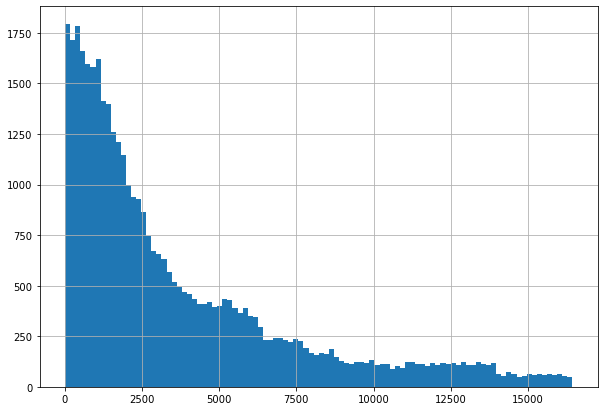

In [88]:
plt.rcParams['figure.figsize'] = (10,7)
df_train_out['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

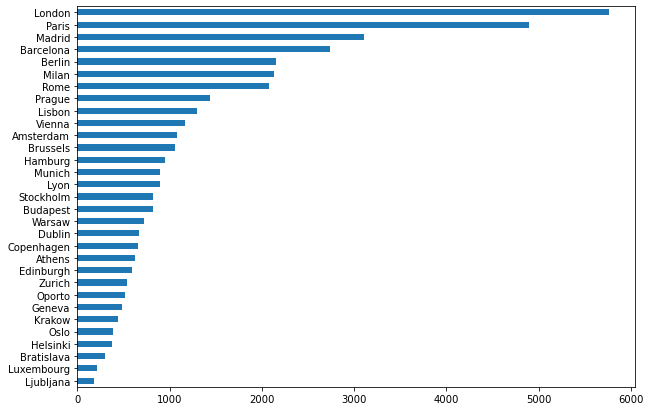

In [89]:
df_train_out['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

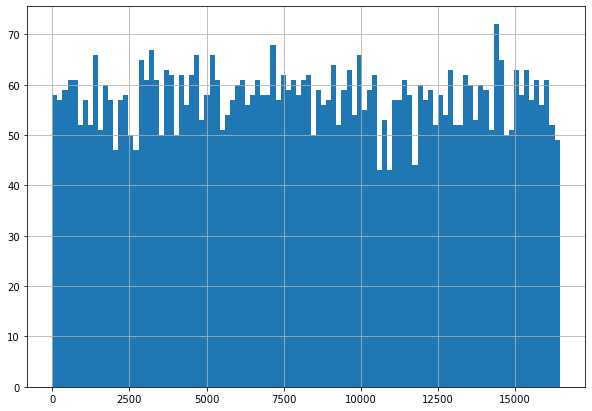

In [90]:
df_train_out['Ranking'][df_train_out['City'] =='London'].hist(bins=100)

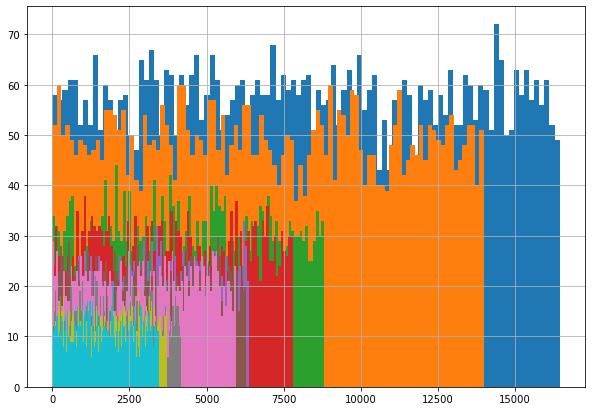

In [91]:
# посмотрим на топ 10 городов
for x in (df_train_out['City'].value_counts())[0:10].index:
    df_train_out['Ranking'][df_train_out['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

<AxesSubplot:>

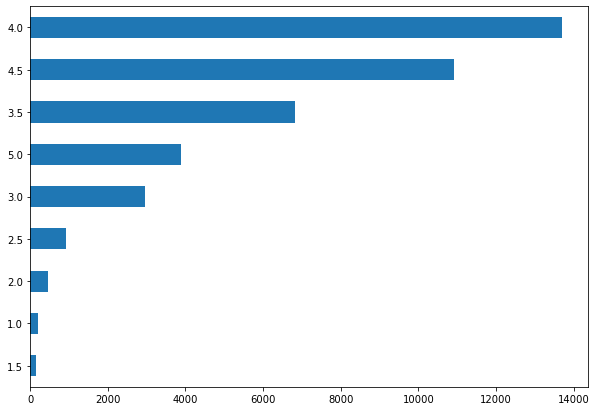

In [92]:
df_train_out['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

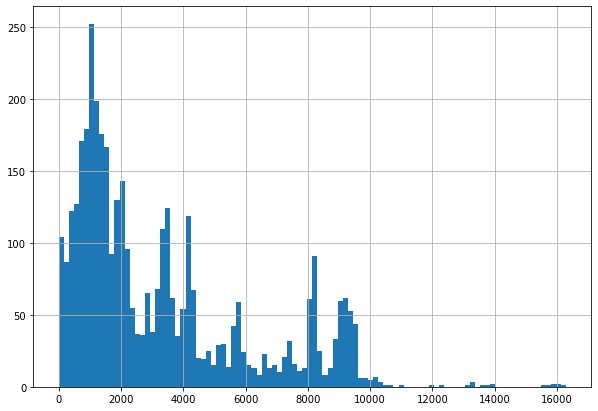

In [93]:
df_train_out['Ranking'][df_train_out['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

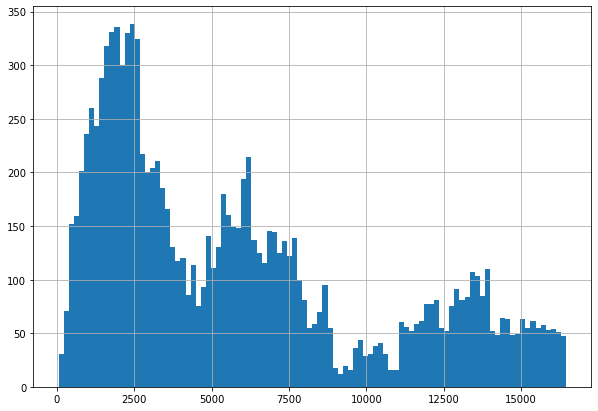

In [94]:
df_train_out['Ranking'][df_train_out['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

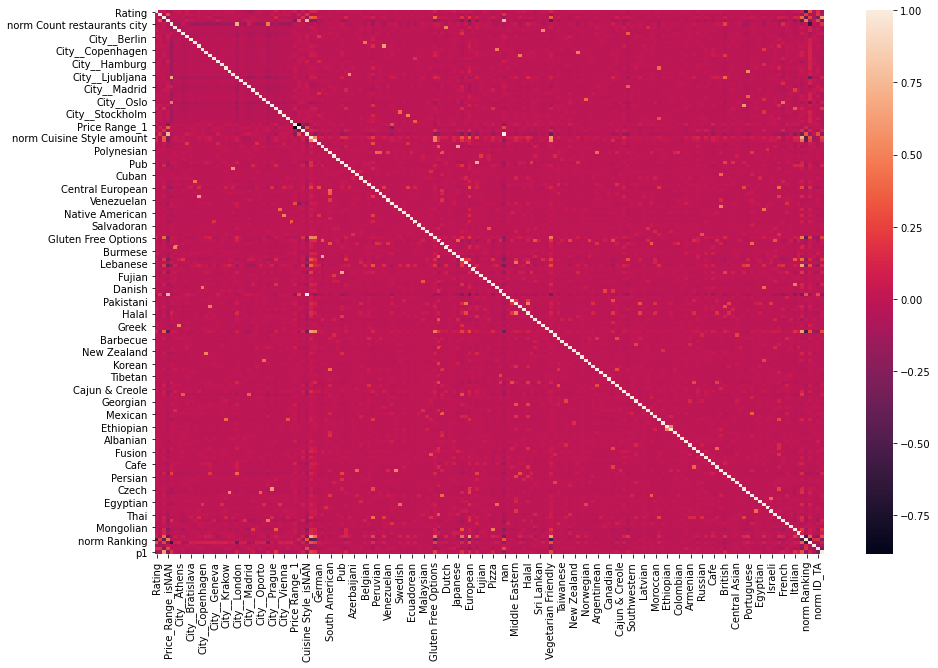

In [95]:
plt.rcParams['figure.figsize'] = (15,10)
# Удалим столбцы по которым идет дубирование признаков (признак и его нормирование)
df_train_out_corr = df_train_out.drop(['sample', 'ID_TA','Number of Reviews', 'Count restaurants city', 
                                       'Cuisine Style amount', 'Restaurant_id count', 'Ranking', 
                                       'date_delta'], axis=1)
sns.heatmap(df_train_out_corr.corr(),)

In [96]:
# В основном корреляция низкая. Более детально рассмотрим на корреляционной матрицы с числами

In [97]:
corr = df_train_out_corr.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [98]:
# Корреляция между целевой переменной и остальными признаками маленькая (нет выраженной зависимости, 
# кроме 'norm Ranking' и 'norm Restaurant_id count'). 

In [99]:
# Посмотрим какие признаки больше всего влияют на ['Rating']
corr['Rating'].abs().sort_values(ascending = False)[:10]
# Помимо обычных показателей на рейтинг оказывает влияние кухни диетического питания: веганские и безглютеновые

Rating                       1.000000
norm Ranking                 0.544704
norm Restaurant_id count     0.296471
norm ID_TA                   0.159111
Vegetarian Friendly          0.128356
Vegan Options                0.122054
norm Cuisine Style amount    0.117340
p1                           0.113631
Gluten Free Options          0.099455
popularity_of_cuisine        0.093983
Name: Rating, dtype: float64

<AxesSubplot:>

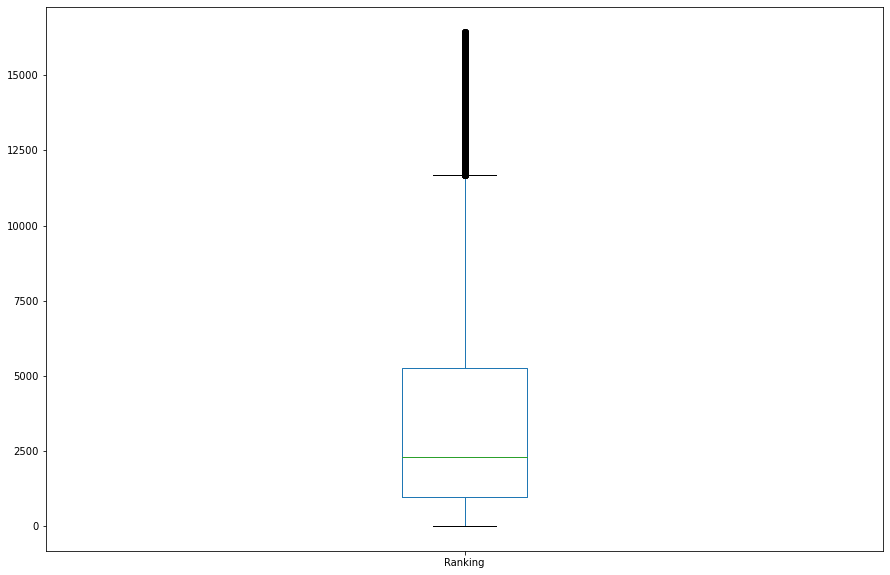

In [100]:
# По графику боксплот столбца ['Ranking'] мы видим кучу значений за пределами усов. 
# Предположительно это можно расценить как выбросы. Но если их привести к значению верхнего уса, то
# MAE повышается. Можно предположить, что наша целевая переменная опирается на эти показатели и не 
# очень придает значение, что по отзывам может идти накрутка или задвоение
df_train_out['Ranking'].plot(kind = 'box')


<AxesSubplot:xlabel='City'>

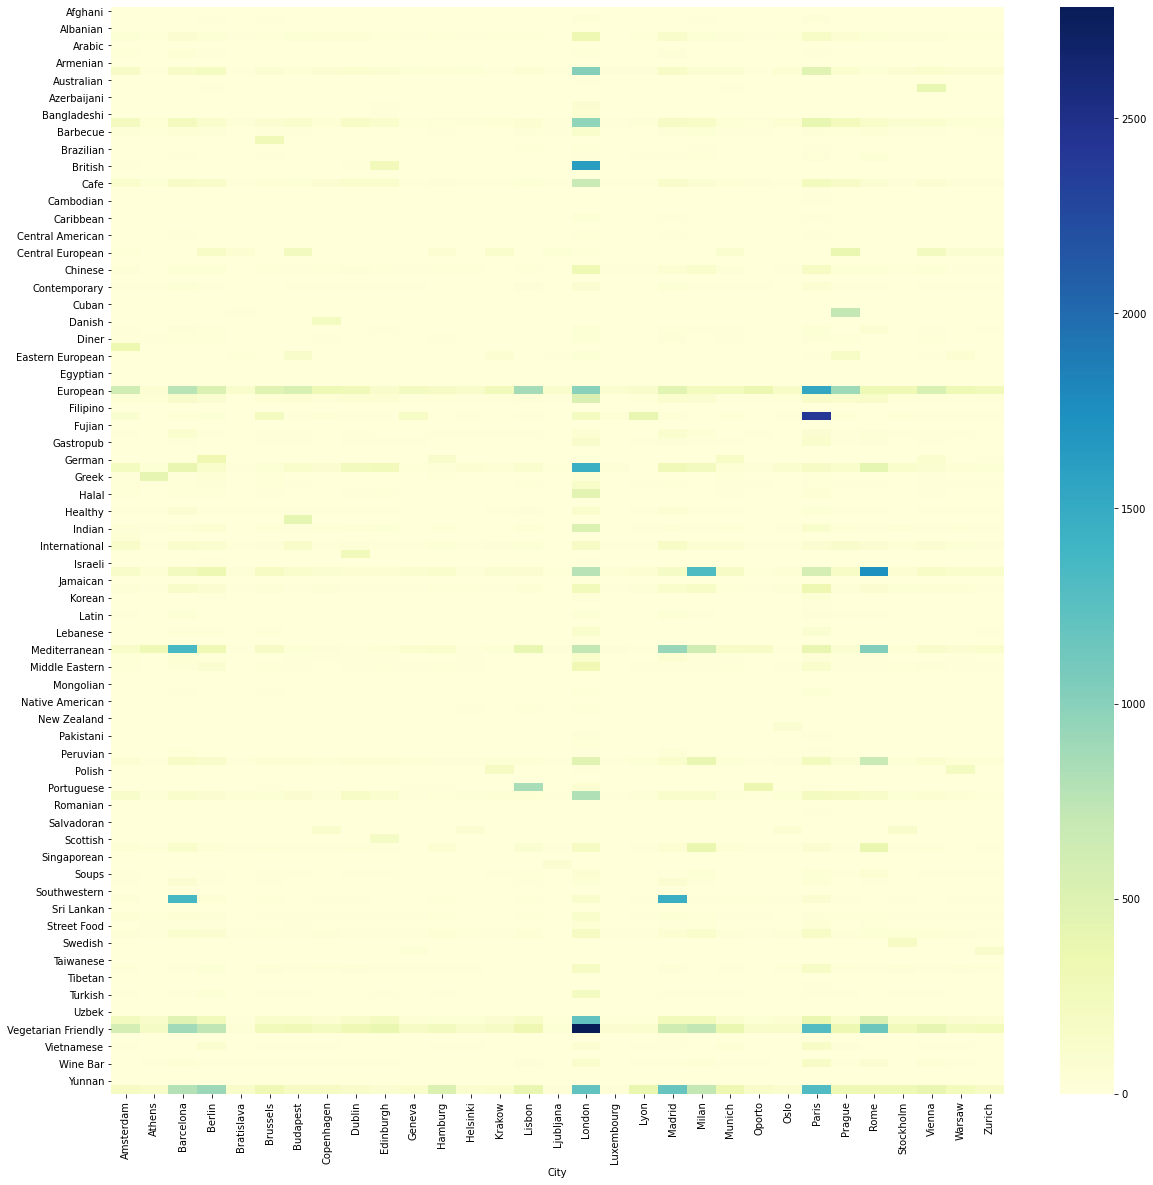

In [101]:
# Посмотрим на стили кухни

plt.subplots(figsize=(20,20))
sns.heatmap(cuisine_in_city.sort_index(), cmap="YlGnBu")

# На тепловой карте видно, что определенные типы кухонь предпочтительны во всех городах, а какие-то
# только в определенных (специфические кухни). 

In [102]:
cuisine_in_city.T.sum().sort_values(ascending = False)
# Больше всего ресторанов с Vegetarian Friendly и European кухнями

Vegetarian Friendly    14021
European               12561
nan                    11590
Mediterranean           7820
Italian                 7433
                       ...  
Yunnan                     2
Burmese                    1
Xinjiang                   1
Salvadoran                 1
Latvian                    1
Length: 126, dtype: int64

<AxesSubplot:>

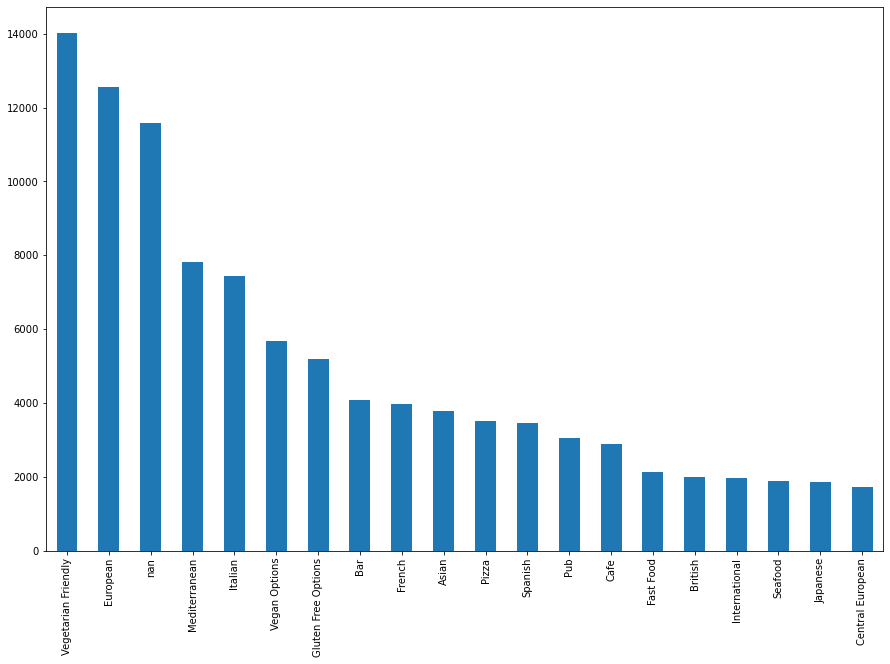

In [103]:
# Популярность стилей кухонь - первая 20-ка
cuisine_in_city.T.sum().sort_values(ascending = False)[:20].plot(kind = 'bar')

<AxesSubplot:xlabel='popularity_of_cuisine', ylabel='Rating'>

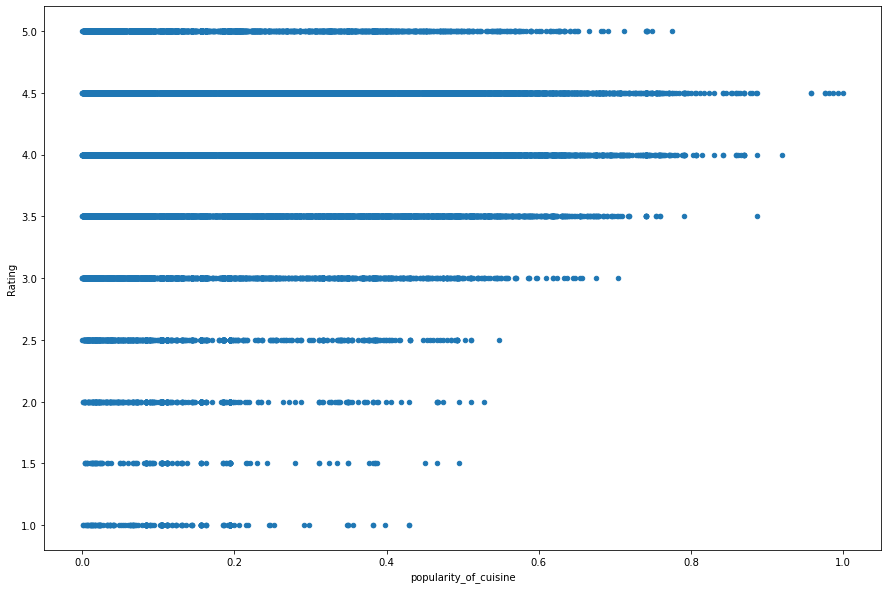

In [104]:
# Влияние популярности кухни на рейтинг (целевую переменную)
df_train_out.plot(x = 'popularity_of_cuisine', y = 'Rating', kind = 'scatter')

<AxesSubplot:ylabel='Frequency'>

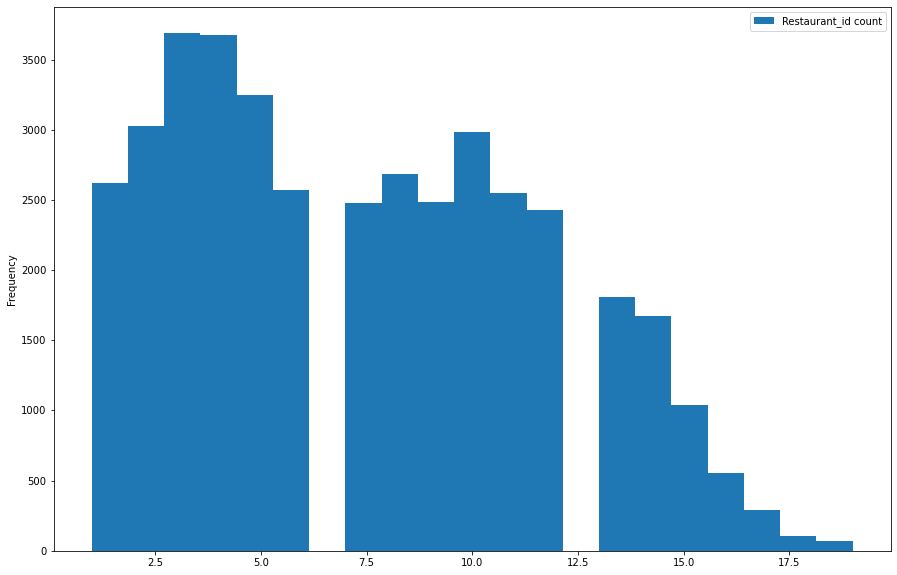

In [105]:
# Количество ресторанов в сети - большинство имеют 3-4 ресторана
df_train_out.plot(y = 'Restaurant_id count', kind = 'hist',  bins = 21)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [106]:
# на всякий случай, заново подгружаем данные
#df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
#df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
#df_train['sample'] = 1 # помечаем где у нас трейн
#df_test['sample'] = 0 # помечаем где у нас тест
#df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

#data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
#data.info()

In [107]:
list(data.columns)

['Restaurant_id',
 'City',
 'Cuisine Style',
 'Ranking',
 'Number of Reviews',
 'Reviews',
 'URL_TA',
 'ID_TA',
 'sample',
 'Rating',
 'Number_of_Reviews_isNAN',
 'date',
 'date_1',
 'date_2',
 'norm Number of Reviews',
 'Price_Range_isNAN',
 'Count restaurants city',
 'norm Count restaurants city',
 'City__Amsterdam',
 'City__Athens',
 'City__Barcelona',
 'City__Berlin',
 'City__Bratislava',
 'City__Brussels',
 'City__Budapest',
 'City__Copenhagen',
 'City__Dublin',
 'City__Edinburgh',
 'City__Geneva',
 'City__Hamburg',
 'City__Helsinki',
 'City__Krakow',
 'City__Lisbon',
 'City__Ljubljana',
 'City__London',
 'City__Luxembourg',
 'City__Lyon',
 'City__Madrid',
 'City__Milan',
 'City__Munich',
 'City__Oporto',
 'City__Oslo',
 'City__Paris',
 'City__Prague',
 'City__Rome',
 'City__Stockholm',
 'City__Vienna',
 'City__Warsaw',
 'City__Zurich',
 'Price Range_1',
 'Price Range_2',
 'Price Range_3',
 'Cuisine Style_isNAN',
 'Cuisine Style amount',
 'norm Cuisine Style amount',
 'Vegan Optio

In [108]:
def preproc_data(df_input):
#    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки (В том числе и isNAN)
    df_output.drop([ 'Number of Reviews', 'Count restaurants city','Cuisine Style amount', 
                    'Restaurant_id count', 'Ranking', 'date_delta', 'Cuisine Style_isNAN','Price_Range_isNAN' ], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
#    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
#    df_output.drop(object_columns, axis = 1, inplace=True)
    l_col = []
    for i in list(df_output.columns):
        if (df_output[i].dtypes == 'datetime64[ns]') or (df_output[i].dtypes == 'object'):
            l_col.append(i)
   
    df_output.drop(l_col, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [109]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

ID_TA  sample  Rating  Number_of_Reviews_isNAN  \
19702  11661326       1     4.0                        0   
14258   6120861       1     4.5                        0   
26375  10831806       1     3.5                        0   
18295   6525585       1     4.5                        0   
45801  12006243       1     4.0                        1   
25838  10386007       1     4.0                        0   
40368  11925562       1     5.0                        1   
1567   13328807       0     0.0                        1   
3307   12376518       0     0.0                        0   
38168   9814149       1     3.5                        0   

       norm Number of Reviews  norm Count restaurants city  City__Amsterdam  \
19702                0.015531                     0.844355                0   
14258                0.021329                     0.844355                0   
26375                0.007351                     0.515134                0   
18295                0.003210                     0.060250                0   
45801                0.003210                     0.455171                0   
25838                0.007041                     0.116339                0   
40368                0.003210                     0.228662                0   
1567                 0.003210                     0.515134                0   
3307                 0.000414                     0.228662                0   
38168                0.000000                     0.356190                0   

       City__Athens  City__Barcelona  City__Berlin  ...  American  Mongolian  \
19702             0                0             0  ...         0          0   
14258             0                0             0  ...         0          0   
26375             0                0             0  ...         1          0   
18295             0                0             0  ...         0          0   
45801             0                1             0  ...         0          0   
25838             0                0             0  ...         0          0   
40368             0                0             0  ...         0          0   
1567              0                0             0  ...         0          0   
3307              0                0             0  ...         0          0   
38168             0                0             1  ...         0          0   

       Italian  Soups  popularity_of_cuisine  norm Ranking  \
19702        0      0               0.470980      0.182865   
14258        0      0               0.153367      0.064292   
26375        0      0               0.344742      0.407357   
18295        0      0               0.387436      0.256081   
45801        0      0               0.111320      0.742780   
25838        0      0               0.708810      0.170930   
40368        0      0               0.350717      0.460583   
1567         0      0               0.155700      0.839124   
3307         0      0               0.066332      0.323220   
38168        0      0               0.193905      0.943171   

       norm Restaurant_id count  norm date_delta  norm ID_TA        p1  
19702                  0.277778         0.017299    0.856084  0.021041  
14258                  0.611111         0.074052    0.424147  0.020290  
26375                  0.111111         0.013050    0.791414  0.007075  
18295                  0.777778         0.054628    0.455699  0.001697  
45801                  0.166667         0.008498    0.882973  0.006882  
25838                  0.333333         0.036722    0.756659  0.001852  
40368                  0.444444         0.008498    0.876684  0.005156  
1567                   0.444444         0.008498    0.986081  0.019785  
3307                   0.166667         0.028528    0.911840  0.000280  
38168                  0.222222         0.008498    0.712077  0.000529  

[10 rows x 173 columns]

In [110]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 173 entries, ID_TA to p1
dtypes: float64(10), int64(128), uint8(35)
memory usage: 54.3 MB


In [111]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 10000 to 49999
Columns: 171 entries, ID_TA to p1
dtypes: float64(9), int64(127), uint8(35)
memory usage: 43.1 MB


**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [112]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [113]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 172), (40000, 172), (40000, 171), (32000, 171), (8000, 171))

# Model 
Сам ML

In [114]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [115]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [116]:
# Округлим предсказанные рейтинги до кратности шагу рейтинга 0.5
def round_rating_pred(rating_pred):
    if rating_pred <= 0.5:
        return 0.0
    if rating_pred <= 1.5:
        return 1.0
    if rating_pred <= 1.75:
        return 1.5
    if rating_pred <= 2.25:
        return 2.0
    if rating_pred <= 2.75:
        return 2.5
    if rating_pred <= 3.25:
        return 3.0
    if rating_pred <= 3.75:
        return 3.5
    if rating_pred <= 4.25:
        return 4.0
    if rating_pred <= 4.75:
        return 4.5
    return 5.0


In [117]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)
y_pred = np.array([round_rating_pred(x) for x in y_pred])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [118]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.164125


<AxesSubplot:>

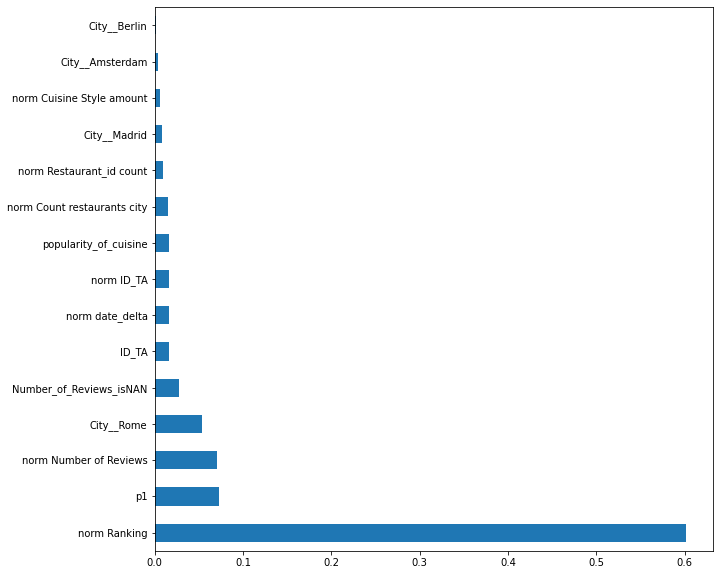

In [119]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [120]:
test_data.sample(10)

ID_TA  Rating  Number_of_Reviews_isNAN  norm Number of Reviews  \
7972  10393907     0.0                        0                0.003313   
8439   1037208     0.0                        0                0.004452   
2529   4769905     0.0                        1                0.003210   
5375   2095434     0.0                        0                0.003313   
8867  10534412     0.0                        0                0.000621   
1669  10583902     0.0                        0                0.002278   
4461   2456170     0.0                        0                0.034997   
1631   2002801     0.0                        0                0.000932   
960    6883493     0.0                        0                0.004970   
8886   4924795     0.0                        0                0.000932   

      norm Count restaurants city  City__Amsterdam  City__Athens  \
7972                     0.844355                0             0   
8439                     0.356190                0             0   
2529                     0.022665                0             0   
5375                     0.204418                0             0   
8867                     0.129680                0             0   
1669                     0.515134                0             0   
4461                     0.354612                0             0   
1631                     1.000000                0             0   
960                      0.844355                0             0   
8886                     1.000000                0             0   

      City__Barcelona  City__Berlin  City__Bratislava  ...  American  \
7972                0             0                 0  ...         0   
8439                0             1                 0  ...         0   
2529                0             0                 1  ...         1   
5375                0             0                 0  ...         0   
8867                0             0                 0  ...         0   
1669                0             0                 0  ...         0   
4461                0             0                 0  ...         0   
1631                0             0                 0  ...         0   
960                 0             0                 0  ...         0   
8886                0             0                 0  ...         0   

      Mongolian  Italian  Soups  popularity_of_cuisine  norm Ranking  \
7972          0        0      0               0.193905      0.612601   
8439          0        0      0               0.071337      0.363893   
2529          0        0      0               0.057789      0.865688   
5375          0        0      0               0.474172      0.432185   
8867          0        0      0               0.016501      0.956848   
1669          0        0      0               0.155700      0.626135   
4461          0        0      0               0.056294      0.291361   
1631          0        0      0               0.036061      0.838837   
960           0        0      0               0.048033      0.451906   
8886          0        0      0               0.036897      0.932251   

      norm Restaurant_id count  norm date_delta  norm ID_TA        p1  
7972                  0.000000         0.018513    0.757275  0.002614  
8439                  0.000000         0.048558    0.027824  0.000929  
2529                  0.277778         0.008498    0.318826  0.001362  
5375                  0.222222         0.079211    0.110323  0.002451  
8867                  0.055556         0.008498    0.768229  0.000355  
1669                  0.333333         0.008498    0.772087  0.008344  
4461                  0.111111         0.002731    0.138446  0.016810  
1631                  0.500000         0.084370    0.103101  0.013670  
960                   0.666667         0.000910    0.483602  0.037044  
8886                  0.055556         0.015175    0.330901  0.003028  

[10 rows x 172 columns]

In [121]:
test_data = test_data.drop(['Rating'], axis=1)

In [122]:
sample_submission

Restaurant_id  Rating
0             id_0     2.0
1             id_1     2.5
2             id_2     4.0
3             id_3     1.0
4             id_4     4.0
...            ...     ...
9995       id_9995     3.0
9996       id_9996     1.5
9997       id_9997     4.5
9998       id_9998     1.0
9999       id_9999     2.5

[10000 rows x 2 columns]

In [123]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [124]:
predict_submission = np.array([round_rating_pred(x) for x in predict_submission])

In [125]:
predict_submission

array([3. , 4.5, 4. , ..., 3. , 4.5, 4.5])

In [126]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

Restaurant_id  Rating
0          id_0     3.0
1          id_1     4.5
2          id_2     4.0
3          id_3     4.5
4          id_4     4.5
5          id_5     4.5
6          id_6     2.5
7          id_7     3.0
8          id_8     4.0
9          id_9     4.5

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
